In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


In [2]:
df = pd.read_csv("../input/telecom-churn/telecom_churn.csv")

In [3]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [4]:
df.isnull().any()

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


สรุปข้อมูลโดยรวมด้วย describe 
ดูว่าข้อมูลมันขยะไหมด้วยค่าเฉลี่ยและค่า max ถ้ามันต่างกันมากก็ไม่ดี / ผิดปกติ

std = 0 แสดงว่าฟีเจอร์นั้นไม่มีความหมายเพราะมันซ้ำกันหมด

จากด้านบนจะเห็นว่าข้อมูลพร้อมใช้หมดเลย



In [6]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

แยกฟีเจอร์กับคลาส

In [7]:
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [8]:
y.unique()

array([0, 1])

เลเบลหรือคลาสที่เป็นไปได้มีค่าอะไรบ้าง

In [9]:
y.sum()

483

ค่าที่เป็น 1

In [10]:
len(y) - y.sum()

2850

ค่าที่เป็น 0

จากด้านบนเราจะเห็นว่าข้อมูลมันไม่บาล้านซ์

# แบ่ง Train / Test data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [12]:
X_train.shape

(2666, 10)

In [13]:
X_test.shape

(667, 10)

In [14]:
np.sum(y_train)

395

In [15]:
np.sum(1 - y_train)

2271

In [16]:
np.sum(y_test)

88

In [17]:
np.sum(1 - y_test)

579

# Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('feature_selection', SelectKBest(f_classif)),
  ('classification', RandomForestClassifier(random_state=0))
])

In [19]:
from sklearn.model_selection import GridSearchCV
params = {
    'feature_selection__k' : [3,5,7],
    'classification__n_estimators' : [10,20,50,100,200],
    'classification__max_depth' : [3,5,7]
}
best_clf = GridSearchCV(clf, params, cv = 10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classification__max_depth': [3, 5, 7],
                         'classification__n_estimators': [10, 20, 50, 100, 200],
                         'feature_selection__k': [3, 5, 7]})

In [20]:
best_clf.best_score_

0.9291177381656388

In [21]:
best_clf.best_params_

{'classification__max_depth': 7,
 'classification__n_estimators': 50,
 'feature_selection__k': 7}

In [22]:
y_predict = best_clf.predict(X_test)
sum(y_predict == y_test) / len(y_test)

0.9295352323838081

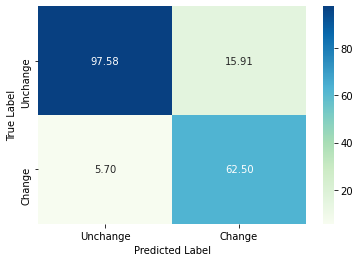

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Unchange', 'Change']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       598
           1       0.62      0.80      0.70        69

    accuracy                           0.93       667
   macro avg       0.80      0.87      0.83       667
weighted avg       0.94      0.93      0.93       667



แบบนี้แปลว่าผลทำนายแม่นในระดับนึง แต่ปัญหาคือคลาส 1 มันไม่แม่นเท่า 0
ใช้ได้เฉพาะ 2 คลาสเท่านั้น

# Homework :

In [25]:
df = pd.read_csv("../input/telecom-churn/telecom_churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [27]:
df.isnull().any()

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

In [28]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [29]:
X = df.drop('Churn',axis = 1)
y = df['Churn']

In [31]:
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [32]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [33]:
y.unique()

array([0, 1])

In [34]:
print(y.sum(),len(y)-y.sum())

483 2850


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
X_train.shape, X_test.shape

((2666, 10), (667, 10))

In [37]:
np.sum(1-y_train)

2271

In [38]:
sum(y_train)

395

In [39]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

clf = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classification', ExtraTreesClassifier(random_state=0))
])

In [41]:
from sklearn.model_selection import GridSearchCV
params = {
    'classification__n_estimators' : [10,50,100,200,300],
    'classification__min_samples_leaf' : [1,2,4,8,16,32],
    'classification__max_features' : ['sqrt',0.1,0.2,0.3,0.4,0.9],
    'classification__criterion' : ['gini','entropy']
}
best_clf = GridSearchCV(clf, params, cv = 10)
best_clf.fit(X_res, y_res)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classification',
                                        ExtraTreesClassifier(random_state=0))]),
             param_grid={'classification__criterion': ['gini', 'entropy'],
                         'classification__max_features': ['sqrt', 0.1, 0.2, 0.3,
                                                          0.4, 0.9],
                         'classification__min_samples_leaf': [1, 2, 4, 8, 16,
                                                              32],
                         'classification__n_estimators': [10, 50, 100, 200,
                                                          300]})

In [42]:
best_score = best_clf.best_score_
best_param = best_clf.best_params_
print(best_score, best_param)

0.9427637120588663 {'classification__criterion': 'gini', 'classification__max_features': 0.1, 'classification__min_samples_leaf': 1, 'classification__n_estimators': 200}


In [43]:
best_clf.best_params_

{'classification__criterion': 'gini',
 'classification__max_features': 0.1,
 'classification__min_samples_leaf': 1,
 'classification__n_estimators': 200}

In [44]:
y_predict = best_clf.predict(X_test)
sum(y_predict==y_test)/len(y_test)

0.8920539730134932